# Stanford Car Dataset: Vehicle Classification


**Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

## MobileNetV2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Flatten, Input, Conv1D, Conv2D, MaxPooling2D
from tensorflow.keras import layers

## Efficent_B1
import efficientnet.keras as efn
from keras import Sequential
from keras.applications import ResNet50

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Pre-processing

In [ ]:
## loading the data
train_car = glob("/content/drive/My Drive/Colab Notebooks/car_data/train/*/*")
test_car = glob("/content/drive/My Drive/Colab Notebooks/car_data/test/*/*")

In [ ]:
## getting the path to the data
train_path = "/content/drive/My Drive/Colab Notebooks/car_data/train/"
test_path = "/content/drive/My Drive/Colab Notebooks/car_data/test/"

In [ ]:
def get_car_class(car):
  '''
  This function will return the car label/class per given image
  '''
    car_class = car.replace("/","").replace("\\","")[48::][:-9]
    return car_class

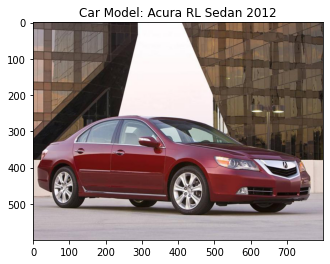

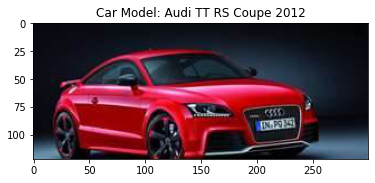

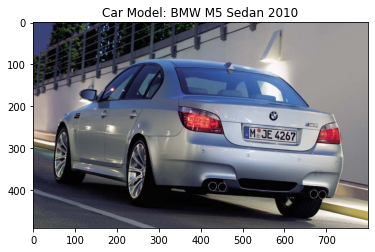

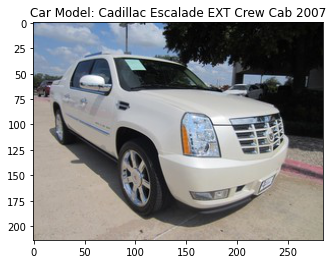

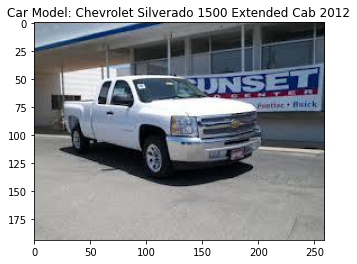

In [ ]:
## showing some car images and their classes
for i in range(1,3500,700):
    image = Image.open(train_car[i])
    label = get_car_class(train_car[i])
    imgplot = plt.imshow(image)
    plt.title(f"Car Model: {label}")
    plt.show()

In [ ]:
import pandas as pd
## loading the labels/ car classes
car_models = pd.read_csv("/content/drive/My Drive/Colab Notebooks/car_data/names.csv",
                                                                delimiter=';')
car_models.head()


,Cars
0,AM General Hummer SUV 2000
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012


In [ ]:
## creating a list with car classes
model_names = list(car_models['Cars'])

## Image Augmentation

In [ ]:
## setting up some parameters for data augmentation
img_width, img_height = 224, 224
train_samples = len(train_car)
validation_samples = len(test_car)
## there are 196 different models
n_classes = len(model_names)
batch_size = 32

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

## performing augmentation on the training data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,
    rotation_range = 5,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
## converting data to a tf.data.Dataset object
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


# Costumized CNN

I tried to customize a convolutional neural network (model) from scratch,  I used  with 3 Convolutional layers and two dense layers. 


In [ ]:
## Constructing a CNN with 3 Convolutional layers and two dense layers.
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(img_width, img_height,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(196, activation='softmax')
])

## checking the layers of the network
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)            

In [ ]:
## define optimizer
opt = tensorflow.keras.optimizers.Adam(lr=0.0001)

## compile model, define optimizer and the loss function
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
## train the model
history_0 = model.fit_generator(train_generator, 
                           steps_per_epoch=15,
                           validation_data=validation_generator, 
                          validation_steps=5, epochs=20)

Epoch 1/20
15/15 [==============================] - 73s 5s/step - loss: 5.2781 - accuracy: 0.0021 - val_loss: 5.2771 - val_accuracy: 0.0059
Epoch 2/20
15/15 [==============================] - 551s 37s/step - loss: 5.2785 - accuracy: 0.0083 - val_loss: 5.2758 - val_accuracy: 0.0063
Epoch 3/20
15/15 [==============================] - 393s 26s/step - loss: 5.2767 - accuracy: 0.0188 - val_loss: 5.2756 - val_accuracy: 0.0090
Epoch 4/20
15/15 [==============================] - 291s 19s/step - loss: 5.2730 - accuracy: 0.0083 - val_loss: 5.2639 - val_accuracy: 0.0063
Epoch 5/20
15/15 [==============================] - 206s 14s/step - loss: 5.2602 - accuracy: 0.0063 - val_loss: 5.2566 - val_accuracy: 0.0098
Epoch 6/20
15/15 [==============================] - 183s 12s/step - loss: 5.2527 - accuracy: 0.0125 - val_loss: 5.2521 - val_accuracy: 0.0102
Epoch 7/20
15/15 [==============================] - 135s 9s/step - loss: 5.2723 - accuracy: 0.0104 - val_loss: 5.2446 - val_accuracy: 0.0117
Epoch 8/2

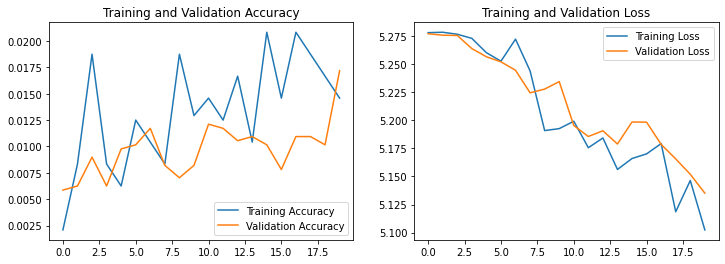

In [ ]:
acc = history_0.history['accuracy']
val_acc = history_0.history['val_accuracy']

loss = history_0.history['loss']
val_loss = history_0.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
def predict_class(model):
    '''
    This function will predict what is the next car, check whether the prediction
    was correct and lastly plot the image of the car
    '''
    image_batch, classes_batch = next(validation_generator)
    predicted_batch = model.predict(image_batch)
    for i in range(0,3):
        image = image_batch[i]
        pred = predicted_batch[i]
        the_pred = np.argmax(pred)
        predicted = model_names[the_pred]
        val_pred = max(pred)
        the_class = np.argmax(classes_batch[i])
        value = model_names[np.argmax(classes_batch[i])]
        plt.figure(i)
        isTrue = (the_pred == the_class)
        plt.title(str(isTrue) + ' class: ' + value + ' - ' +\
              'predicted: ' + predicted + ' with probability of: '\
               + str(val_pred)[:5])
        plt.imshow(image)

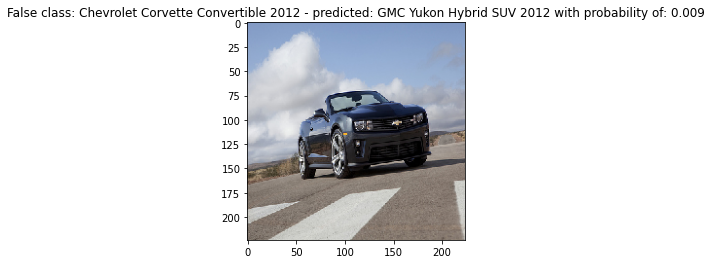

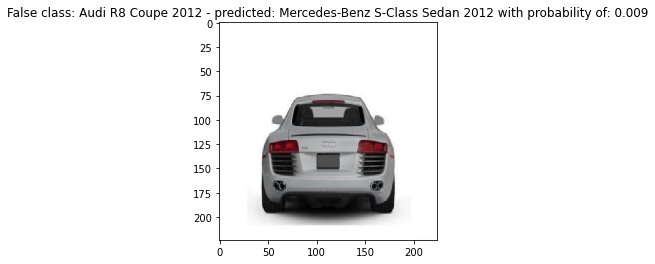

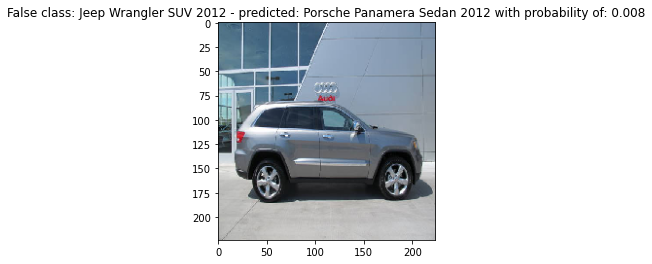

In [ ]:
predict_class(model)

# Transfer Learning 

Transfer learning is a process where you take an existing trained model. In this project, we used three different models MobileNet V2, VGG16 and EfficientNet B1. 



## Mobile Net V2

MobileNet-v2 is a convolutional neural network that contains 53 layers. This network has been trained  on more than a million images from the ImageNet database and it can classify objects into more than a 1000 categories. This CNN has been optimized to perform well on mobile devices.


In [ ]:
## trasfer learning using mobile net
mobilenet_model = MobileNetV2(include_top=False,
                                    weights='imagenet',
                                    input_shape=(224, 224, 3))


## Change all layers to non-trainable
for layer in mobilenet_model.layers:
    layer.trainable = False

## adding some extra layers
x = GlobalAveragePooling2D()(mobilenet_model.output)
x = BatchNormalization()(x)
x = Dense(units=1024,
          activation='relu',kernel_regularizer=regularizers.l2(0.01), 
          kernel_initializer='random_uniform',
          bias_initializer='zeros')(x)

x = BatchNormalization()(x)
output = Dense(units=196, activation='softmax')(x)

## creating the extended model
model_1 = Model(inputs=mobilenet_model.input, outputs=output)

In [ ]:
model_1.summary()

Model: "functional_35"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_25[0][0]                   
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________

In [ ]:
## compile the model, define optimizer and the loss function
opt = tensorflow.keras.optimizers.Adam(lr=0.0001)

model_1.compile(loss='categorical_crossentropy',
              optimizer=opt, metrics=['accuracy'])


In [ ]:
## train the model
history_1 = model_1.fit_generator(train_generator, 
                           steps_per_epoch=len(train_generator),
                           validation_data=validation_generator, 
                          validation_steps=len(validation_generator), epochs=20)

Epoch 1/20
255/255 [==============================] - 214s 840ms/step - loss: 15.2798 - accuracy: 0.0592 - val_loss: 13.8995 - val_accuracy: 0.1210
Epoch 2/20
255/255 [==============================] - 211s 828ms/step - loss: 12.6481 - accuracy: 0.2229 - val_loss: 12.1599 - val_accuracy: 0.2077
Epoch 3/20
255/255 [==============================] - 211s 827ms/step - loss: 10.8491 - accuracy: 0.3777 - val_loss: 10.8359 - val_accuracy: 0.2599
Epoch 4/20
255/255 [==============================] - 211s 827ms/step - loss: 9.3964 - accuracy: 0.4838 - val_loss: 9.7350 - val_accuracy: 0.3000
Epoch 5/20
255/255 [==============================] - 211s 827ms/step - loss: 8.1648 - accuracy: 0.5861 - val_loss: 8.8061 - val_accuracy: 0.3258
Epoch 6/20
255/255 [==============================] - 212s 829ms/step - loss: 7.1260 - accuracy: 0.6528 - val_loss: 8.0209 - val_accuracy: 0.3442
Epoch 7/20
255/255 [==============================] - 211s 827ms/step - loss: 6.2459 - accuracy: 0.7167 - val_loss: 7.

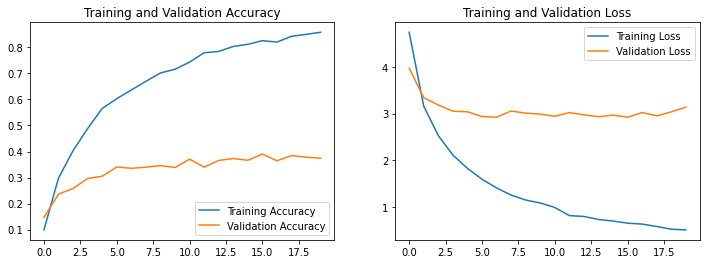

In [ ]:
acc_1 = history_1.history['accuracy']
val_acc_1 = history_1.history['val_accuracy']

loss_1 = history_1.history['loss']
val_loss_1 = history_1.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_1, label='Training Accuracy')
plt.plot(epochs_range, val_acc_1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_1, label='Training Loss')
plt.plot(epochs_range, val_loss_1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predict_class(model_1)

## VGG 16 

Check [here](https://gist.github.com/AlbionKransiqi/cafb0fe82417a51eeb797ebf30785f51) to see VGG16 implementation (kernel died and it was taking too much time to rerun everything)

## EfficientNet B1

EfficientNet is among the most efficient models Also, this network has been pre-trained on the ImageNet database, but it is considered to be one the most efficient models. In comparsion with other CNNs, EfficientNet use a method called compound scaling, which uniformly scales all dimensions of depth/width/resolution while maintaingn the balance (ref). That reduces significantly the the dimensions of the classification problems. 

In [ ]:
from keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization
from keras import Model, optimizers

## loading the EfficientNetB1 model
base_model = efn.EfficientNetB1(weights='imagenet', include_top=False)

## adding some extra layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(196, activation='softmax')(x)
model_2 = Model(inputs=base_model.input, outputs=predictions)

## fix the feature extraction part of the model
for layer in base_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False
        
model_2.summary()

27164672/27164032 [==============================] - 0s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, None, None, 3 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, None, None, 3 0           stem_bn[0][0]                    
______________________

In [ ]:
## compile model, define optimizer and the loss function
model_2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.01), metrics=['accuracy'])

In [ ]:
## train the model
history_2 = model_2.fit_generator(generator=train_generator,
                    steps_per_epoch=len(train_generator) ,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator),
                    epochs=20)

Epoch 1/20
255/255 [==============================] - 206s 807ms/step - loss: 4.7295 - accuracy: 0.0905 - val_loss: 3.8548 - val_accuracy: 0.2104
Epoch 2/20
255/255 [==============================] - 202s 790ms/step - loss: 3.0157 - accuracy: 0.3692 - val_loss: 2.6637 - val_accuracy: 0.3934
Epoch 3/20
255/255 [==============================] - 201s 789ms/step - loss: 1.9686 - accuracy: 0.5624 - val_loss: 2.0400 - val_accuracy: 0.5106
Epoch 4/20
255/255 [==============================] - 201s 787ms/step - loss: 1.3963 - accuracy: 0.6795 - val_loss: 1.6762 - val_accuracy: 0.5834
Epoch 5/20
255/255 [==============================] - 202s 791ms/step - loss: 1.0631 - accuracy: 0.7491 - val_loss: 1.4870 - val_accuracy: 0.6157
Epoch 6/20
255/255 [==============================] - 201s 788ms/step - loss: 0.8484 - accuracy: 0.7978 - val_loss: 1.3790 - val_accuracy: 0.6410
Epoch 7/20
255/255 [==============================] - 201s 786ms/step - loss: 0.6741 - accuracy: 0.8426 - val_loss: 1.3045 -

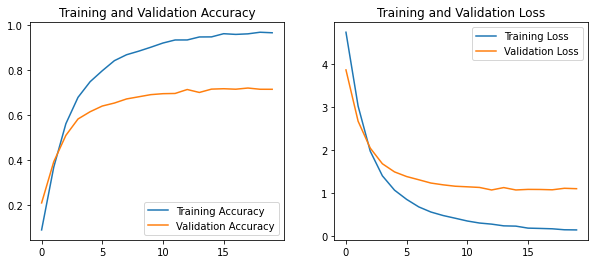

In [ ]:
acc_2 = history_2.history['accuracy']
val_acc_2 = history_2.history['val_accuracy']

loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_2, label='Training Accuracy')
plt.plot(epochs_range, val_acc_2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_2, label='Training Loss')
plt.plot(epochs_range, val_loss_2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

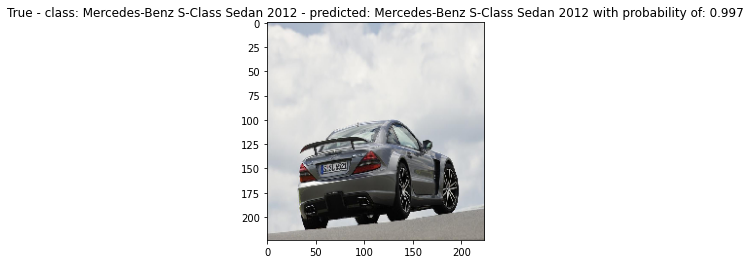

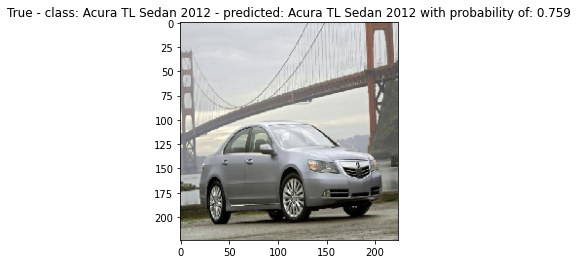

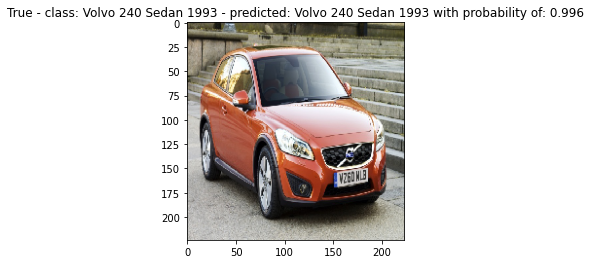

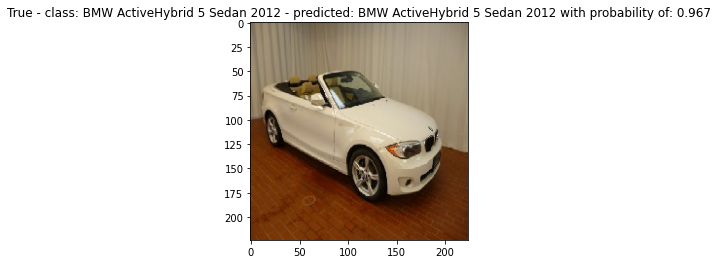

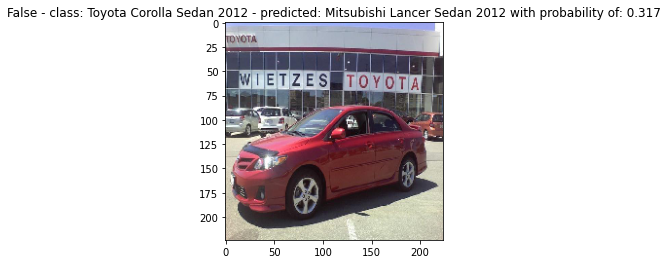

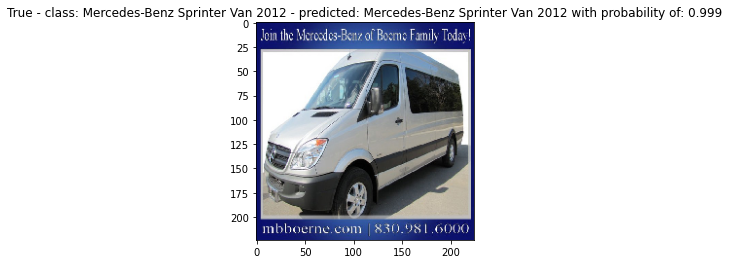

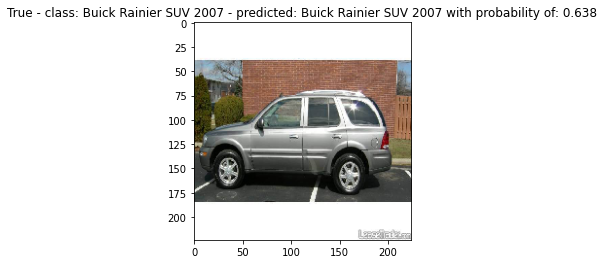

In [ ]:
## making prediction about different car models
predict_class(model_2)

**Investigating other metrics**

NOTE: to get the accurate results you have to set up the size of valid generator to 8144 (because of time constrains I won't be able to rerun it again)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

## evaluating the model
evaluation = model_2.evaluate_generator(validation_generator)
print("Testing accuracy = ",evaluation[1])

## printing the confusion matrix
for i,j in validation_generator:
    print(i.shape, j.shape)
    p = model.predict(i)
    p = p.argmax(-1)
    t = j.argmax(-1)
    print(classification_report(t,p))
    #print(confusion_matrix(t,p))
    break;

Testing accuracy =  0.7153339385986328
(150, 224, 224, 3) (150, 196)
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.20      0.50      0.29         2
          21       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         1
          27

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Comparsion of the networks above

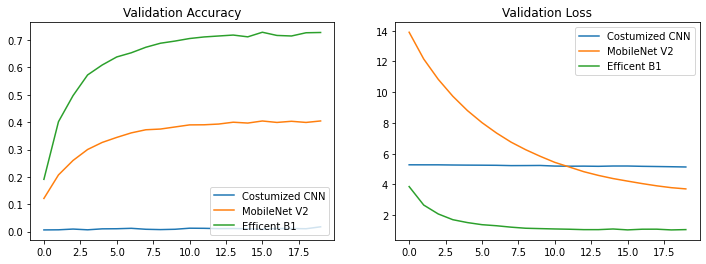

In [ ]:
acc = history_0.history['accuracy']
val_acc = history_0.history['val_accuracy']

loss = history_0.history['loss']
val_loss = history_0.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, val_acc, label='Costumized CNN')
plt.plot(epochs_range, val_acc_1, label='MobileNet V2')
plt.plot(epochs_range, val_acc_2, label='Efficent B1')
plt.legend(loc='lower right')
plt.title('Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, val_loss, label='Costumized CNN')
plt.plot(epochs_range, val_loss_1, label='MobileNet V2')
plt.plot(epochs_range, val_loss_2, label='Efficent B1')

plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.show()